# **SVM(Support Vector Machine)으로 캘리포니아 주택 가격 회귀 모델 만들기**

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_california_housing

## 데이터 불러오기

In [2]:
dataset = fetch_california_housing()

In [3]:
# 필요한 데이터 추출하기  dataset.속성, dataset[배열] 모두 가능
data = dataset.data
label = dataset.target
columns = dataset.feature_names

data = pd.DataFrame(data, columns=columns)
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [4]:
print(data.shape)

(20640, 8)


## 데이터셋 준비하기

In [5]:
X_train,X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2023)

print(X_train['MedInc'])

20539    4.2198
17336    5.7306
15150    3.1607
11440    6.2984
3988     4.9250
          ...  
6659     3.1875
5852     3.5875
6049     3.0429
19127    4.0729
14790    2.9286
Name: MedInc, Length: 16512, dtype: float64


## 모델링

## 서포트 벡터 머신 회귀(Support Vector Machine Regressor)

### 1. 단순 서포트 벡터 머신 회귀  ###
column 하나 사용

In [6]:
svm_regr = SVR(C=2)

--> C가 너무 높으면 과적합(overfitting), 너무 낮으면 과소적합(underfitting)이 될 수 있다.

In [7]:
# train
# 1차원 배열 -> 2차원 배열로 바꿔주기
svm_regr.fit(X_train['MedInc'].values.reshape(-1, 1), y_train)

SVR(C=2)

## 모델 평가하기

In [8]:
# 예측값
y_pred = svm_regr.predict(X_test['MedInc'].values.reshape(-1, 1))

결정계수(R2 score)로 결과 확인: 선형 회귀 모델을 fitting한 후, 모델이 데이터에 얼마나 적합한지 확인하는 적합도 통계 방법 중 하나. 0-1 사이의 값으로 나타내며 1에 가까울수록 모델과 데이터의 연관성이 높다.

In [9]:
print('단순 서포트 벡터 머신 회귀 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 서포트 벡터 머신 회귀 R2: 0.4630


--> C값을 변경해 본다. C값은 두 서포트 벡터 영역 안에 허용하는 개수를 의미한다.

In [10]:
# best c값 찾기
arr = np.arange(1, 11)

best_C = 1
best_r2 = 0

for C in arr:
    svm_regr = SVR(C=C)
    svm_regr.fit(X_train['MedInc'].values.reshape(-1, 1), y_train)
    temp_r2 = r2_score(y_test, y_pred)
    print('단순 서포트 벡터 머신 회귀 C={} R2: {:.4f}'.format(C, temp_r2))

    if best_r2 < temp_r2:
        best_C = C
        best_r2 = temp_r2

print('최적의 결과는 C={} r2={:.4f}'.format(best_C, best_r2))

단순 서포트 벡터 머신 회귀 C=1 R2: 0.4630
단순 서포트 벡터 머신 회귀 C=2 R2: 0.4630
단순 서포트 벡터 머신 회귀 C=3 R2: 0.4630
단순 서포트 벡터 머신 회귀 C=4 R2: 0.4630
단순 서포트 벡터 머신 회귀 C=5 R2: 0.4630
단순 서포트 벡터 머신 회귀 C=6 R2: 0.4630
단순 서포트 벡터 머신 회귀 C=7 R2: 0.4630
단순 서포트 벡터 머신 회귀 C=8 R2: 0.4630
단순 서포트 벡터 머신 회귀 C=9 R2: 0.4630
단순 서포트 벡터 머신 회귀 C=10 R2: 0.4630
최적의 결과는 C=1 r2=0.4630


## 결과 시각화하기

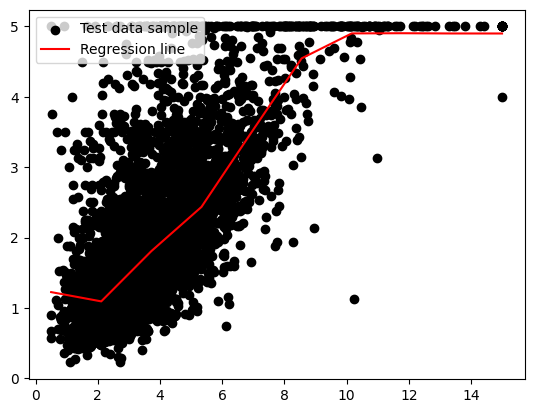

In [11]:
# X축, y축 지정
line_X = np.linspace(np.min(X_test['MedInc']), np.max(X_test['MedInc']), 10)
line_y = svm_regr.predict(line_X.reshape(-1, 1))

# 산점도(scatter plot), 회귀선(regression line), 각주(legend) 나타내기
plt.scatter(X_test['MedInc'], y_test, c='black')
plt.plot(line_X, line_y, c='red')
plt.legend(['Test data sample', 'Regression line'], loc='upper left')
plt.show()

### 2. 다중 서포트 벡터 머신 회귀  
전체 columns  사용

In [12]:
# C=20 --> 전체 columns를 사용할 것이므로 변수가 많아질 것에 대비하여 20의 값을 준다.
svm_regr = SVR(C=20)

In [13]:
svm_regr = SVR(C=20)
svm_regr.fit(X_train, y_train)
y_pred = svm_regr.predict(X_test)
print('다중 서포트 벡터 머신 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

다중 서포트 벡터 머신 회귀, R2 : 0.2619


--> C값을 변경해 본다.

In [14]:
# best C값 찾기
arr = np.arange(25000,25005)

best_C = 0
best_r2 = 0

for C in arr:
  svm_regr = SVR(C=C)
  svm_regr.fit(X_train, y_train)
  y_pred = svm_regr.predict(X_test)
  temp_r2 = r2_score(y_test, y_pred)
  print('다중 서포트 벡터 머신 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

  if best_r2 < temp_r2:
    best_C = C
    best_r2 = temp_r2

print('최적의 결과는 C={} r2={:.4f}'.format(best_C, best_r2))

다중 서포트 벡터 머신 회귀, R2 : 0.6483
다중 서포트 벡터 머신 회귀, R2 : 0.6484
다중 서포트 벡터 머신 회귀, R2 : 0.6483
다중 서포트 벡터 머신 회귀, R2 : 0.6484
다중 서포트 벡터 머신 회귀, R2 : 0.6483
최적의 결과는 C=25003 r2=0.6484


In [15]:
# best c값 찾기
arr = np.arange(10000,25000)

best_C = 0
best_r2 = 0

for C in arr:
  svm_regr = SVR(C=C)
  svm_regr.fit(X_train, y_train)
  y_pred = svm_regr.predict(X_test)
  temp_r2 = r2_score(y_test, y_pred)
  print('다중 서포트 벡터 머신 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

  if best_r2 < temp_r2:
    best_C = C
    best_r2 = temp_r2

print('최적의 결과는 C={} r2={:.4f}'.format(best_C, best_r2))

다중 서포트 벡터 머신 회귀, R2 : 0.6429
다중 서포트 벡터 머신 회귀, R2 : 0.6429
다중 서포트 벡터 머신 회귀, R2 : 0.6428
다중 서포트 벡터 머신 회귀, R2 : 0.6428
다중 서포트 벡터 머신 회귀, R2 : 0.6429
다중 서포트 벡터 머신 회귀, R2 : 0.6429


KeyboardInterrupt: ignored